In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

C:\Users\Admin\AppData\Local\Temp\ipykernel_5588\3474590089.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Import dataset

In [2]:
data = pd.read_csv('..\data\cinemaTicket_Ref.csv')
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


# Data Imputation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [4]:
data.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean") 
imputer.fit(data[['occu_perc', 'capacity']])
data[['occu_perc', 'capacity']] = imputer.transform(data[['occu_perc', 'capacity']])
data.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

# Encode Categorical Data

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['timestamp'] = data['date'].view('int64') / 10**9
data = data.drop(columns = ['date'])  

C:\Users\Admin\AppData\Local\Temp\ipykernel_5588\3707561113.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data['timestamp'] = data['date'].view('int64') / 10**9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142524 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142524 non-null  float64
 10  month         142524 non-null  int32  
 11  quarter       142524 non-null  int64  
 12  day           142524 non-null  int32  
 13  timestamp     142524 non-null  float64
dtypes: float64(4), int32(2), int64(8)
memory usage: 14.1 MB


In [8]:
data.head() 

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day,timestamp
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,5,2,5,1.525478e+09
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,5,2,5,1.525478e+09
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,5,2,5,1.525478e+09
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,5,2,5,1.525478e+09
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,5,2,5,1.525478e+09


# Choose significant features

<Axes: >

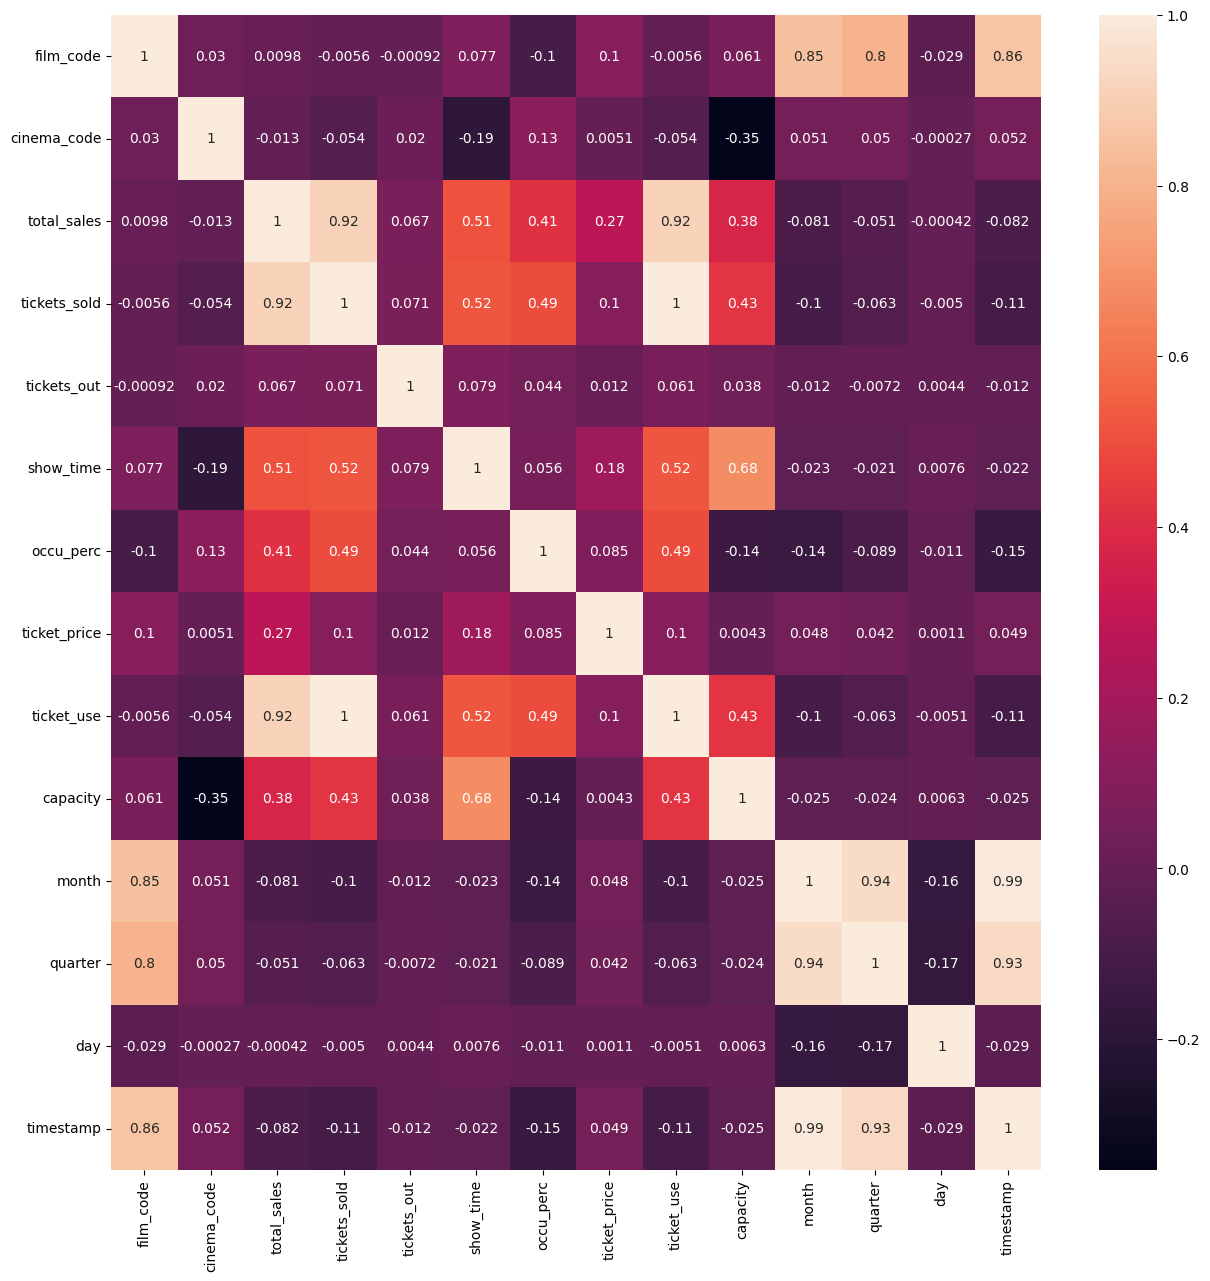

In [9]:
plt.figure(figsize = (15, 15)) 
sns.heatmap(data.corr(), annot = True)

In [10]:
data.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'month', 'quarter', 'day', 'timestamp'],
      dtype='object')

In [11]:
features = ["tickets_sold", "show_time", "occu_perc", "ticket_price", "ticket_use", "capacity"]

In [12]:
X = data[features]
y = data["total_sales"]

# Splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split      
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 0)   

In [14]:
X_train

,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity
65275,24,6,1.25,100000.000000,24,1920.000000
11918,133,2,23.54,84323.308271,133,564.995752
124977,218,3,53.43,80000.000000,218,408.010481
52790,61,2,9.08,70000.000000,61,671.806167
61315,835,13,60.25,88670.658683,835,1385.892116
...,...,...,...,...,...,...
41993,296,5,17.46,60000.000000,296,1695.303551
97639,2,1,0.52,120000.000000,2,384.615385
95939,99,2,18.82,50000.000000,99,526.036132
117952,153,1,57.52,37908.496732,153,265.994437


In [15]:
X_test 

,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity
115677,44,3,5.33,40909.090909,44,825.515947
30581,57,3,27.14,117894.736842,57,210.022108
20436,92,3,66.67,150000.000000,92,137.993100
134415,199,6,24.42,80000.000000,199,814.905815
80751,3,2,1.40,50000.000000,3,214.285714
...,...,...,...,...,...,...
91050,143,4,8.94,80000.000000,143,1599.552573
131574,105,8,10.17,147142.857143,105,1032.448378
77262,251,4,29.74,107888.446215,251,843.981170
135945,396,4,64.81,146590.909091,396,611.016818


# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler() 

X_train[['ticket_price', 'capacity']] = sc1.fit_transform(X_train[['ticket_price', 'capacity']])
X_test[['ticket_price', 'capacity']] = sc1.transform(X_test[['ticket_price', 'capacity']])
X_train[['tickets_sold', 'ticket_use']] = sc2.fit_transform(X_train[['tickets_sold', 'ticket_use']])
X_test[['tickets_sold', 'ticket_use']] = sc2.transform(X_test[['tickets_sold', 'ticket_use']]) 


In [17]:
X_train

,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity
65275,-0.413232,6,1.25,0.562509,-0.412654,1.115728
11918,-0.026338,2,23.54,0.091061,-0.025521,-0.303946
124977,0.275368,3,53.43,-0.038955,0.276372,-0.468423
52790,-0.281901,2,9.08,-0.339687,-0.281242,-0.192038
61315,2.465400,13,60.25,0.221800,2.467756,0.556129
...,...,...,...,...,...,...
41993,0.552228,5,17.46,-0.640419,0.553402,0.880307
97639,-0.491321,1,0.52,1.163973,-0.490791,-0.492935
95939,-0.147021,2,18.82,-0.941151,-0.146278,-0.344765
117952,0.044651,1,57.52,-1.304781,0.045513,-0.617217


In [18]:
X_test

,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity
115677,-0.342242,3,5.33,-1.214543,-0.341620,-0.030992
30581,-0.296099,3,27.14,1.100661,-0.295448,-0.675861
20436,-0.171867,3,66.67,2.066169,-0.171140,-0.751327
134415,0.207928,6,24.42,-0.038955,0.208890,-0.042108
80751,-0.487771,2,1.40,-0.941151,-0.487239,-0.671394
...,...,...,...,...,...,...
91050,0.009157,4,8.94,-0.038955,0.009996,0.779987
131574,-0.125724,8,10.17,1.980246,-0.124968,0.185817
77262,0.392501,4,29.74,0.799740,0.393577,-0.011645
135945,0.907176,4,64.81,1.963647,0.908570,-0.255728


# Build model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_percentage_error 

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

res = r2_score(y_test, y_pred)
print("r_2 score: ", res) 

r_2 score:  0.8754202931345247


In [20]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor(random_state = 1)
dtr_model.fit(X_train,y_train)
y_pred = dtr_model.predict(X_test)

res = r2_score(y_test, y_pred)
print("r_2 score: ", res) 

r_2 score:  0.9957394109839368


In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)

res = r2_score(y_test, y_pred)
print("r_2 score: ", res) 

r_2 score:  0.99760362783845


In [22]:
import xgboost as xgb
from xgboost import XGBRegressor 

xgb_model = XGBRegressor() 
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

res = r2_score(y_test, y_pred)
print("r_2 score: ", res)  

r_2 score:  0.9966927655693273


In [23]:
from sklearn.model_selection import cross_val_score 

In [24]:
model = XGBRegressor() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

res = r2_score(y_test, y_pred)
print("r_2 score: ", res) 

error1 = root_mean_squared_error(y_test, y_pred)
print("Root mean squared error: ", error1)

error2 = mean_absolute_percentage_error(y_test, y_pred)
print("Mean absolute percentage error: ", error2)

score = cross_val_score(model, X, y, cv = 5, scoring = 'r2')
print('Cross val score: ', score, score.mean(), score.std()) 

r_2 score:  0.9966927655693273
Root mean squared error:  1703777.1796348223
Mean absolute percentage error:  0.04601723716233153
Cross val score:  [0.99927185 0.99541667 0.99315953 0.99727342 0.99751344] 0.9965269829445665 0.0020802443716991937


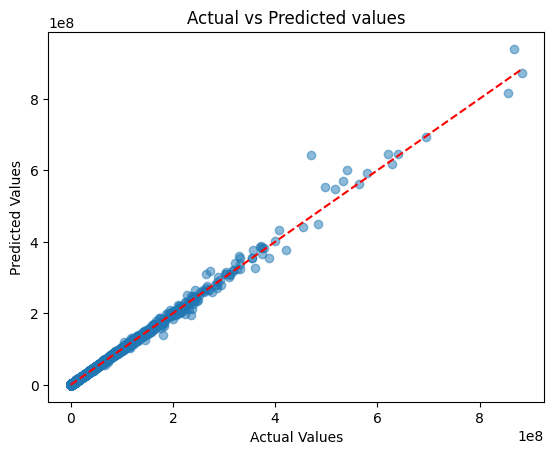

In [25]:
plt.scatter(y_test, y_pred, alpha = 0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle = '--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted values')    
plt.show() 